<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/Insurance_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving insurance.txt to insurance.txt
User uploaded file "insurance.txt" with length 866 bytes


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
file = open('insurance.txt', 'r')
text = file.read()

In [0]:
print(text)

Auto Insurance in Sweden

In the following data
X = number of claims
Y = total payment for all the claims in thousands of Swedish Kronor
for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/
       slr/frames/frame.html

X	Y
108	392,5
19	46,2
13	15,7
124	422,2
40	119,4
57	170,9
23	56,9
14	77,5
45	214
10	65,3
5	20,9
48	248,1
11	23,5
23	39,6
7	48,8
2	6,6
24	134,9
6	50,9
3	4,4
23	113
6	14,8
9	48,7
9	52,1
3	13,2
29	103,9
7	77,5
4	11,8
20	98,1
7	27,9
4	38,1
0	0
25	69,2
6	14,6
5	40,3
22	161,5
11	57,2
61	217,6
12	58,1
4	12,6
16	59,6
13	89,9
60	202,4
41	181,3
37	152,8
55	162,8
41	73,4
11	21,3
27	92,6
8	76,1
3	39,9
17	142,1
13	93
13	31,9
15	32,1
8	55,6
29	133,3
30	194,5
24	137,9
9	87,4
31	209,8
14	95,5
53	244,6
26	187,5



In [0]:
text_lines = text.split('\n')

In [0]:
print(text_lines)

['Auto Insurance in Sweden', '', 'In the following data', 'X = number of claims', 'Y = total payment for all the claims in thousands of Swedish Kronor', 'for geographical zones in Sweden', 'Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance', 'http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/', '       slr/frames/frame.html', '', 'X\tY', '108\t392,5', '19\t46,2', '13\t15,7', '124\t422,2', '40\t119,4', '57\t170,9', '23\t56,9', '14\t77,5', '45\t214', '10\t65,3', '5\t20,9', '48\t248,1', '11\t23,5', '23\t39,6', '7\t48,8', '2\t6,6', '24\t134,9', '6\t50,9', '3\t4,4', '23\t113', '6\t14,8', '9\t48,7', '9\t52,1', '3\t13,2', '29\t103,9', '7\t77,5', '4\t11,8', '20\t98,1', '7\t27,9', '4\t38,1', '0\t0', '25\t69,2', '6\t14,6', '5\t40,3', '22\t161,5', '11\t57,2', '61\t217,6', '12\t58,1', '4\t12,6', '16\t59,6', '13\t89,9', '60\t202,4', '41\t181,3', '37\t152,8', '55\t162,8', '41\t73,4', '11\t21,3', '27\t92,6', '8\t76,1', '3\t39,9', '17\t1

In [0]:
for i in range(11):
  text_lines.pop(0)

In [0]:
text_lines.pop(63)

''

In [0]:
print(text_lines)

['108\t392,5', '19\t46,2', '13\t15,7', '124\t422,2', '40\t119,4', '57\t170,9', '23\t56,9', '14\t77,5', '45\t214', '10\t65,3', '5\t20,9', '48\t248,1', '11\t23,5', '23\t39,6', '7\t48,8', '2\t6,6', '24\t134,9', '6\t50,9', '3\t4,4', '23\t113', '6\t14,8', '9\t48,7', '9\t52,1', '3\t13,2', '29\t103,9', '7\t77,5', '4\t11,8', '20\t98,1', '7\t27,9', '4\t38,1', '0\t0', '25\t69,2', '6\t14,6', '5\t40,3', '22\t161,5', '11\t57,2', '61\t217,6', '12\t58,1', '4\t12,6', '16\t59,6', '13\t89,9', '60\t202,4', '41\t181,3', '37\t152,8', '55\t162,8', '41\t73,4', '11\t21,3', '27\t92,6', '8\t76,1', '3\t39,9', '17\t142,1', '13\t93', '13\t31,9', '15\t32,1', '8\t55,6', '29\t133,3', '30\t194,5', '24\t137,9', '9\t87,4', '31\t209,8', '14\t95,5', '53\t244,6', '26\t187,5']


In [0]:
line = []
for text_line in text_lines:
  line.append(text_line.split('\t'))

In [0]:
line

[['108', '392,5'],
 ['19', '46,2'],
 ['13', '15,7'],
 ['124', '422,2'],
 ['40', '119,4'],
 ['57', '170,9'],
 ['23', '56,9'],
 ['14', '77,5'],
 ['45', '214'],
 ['10', '65,3'],
 ['5', '20,9'],
 ['48', '248,1'],
 ['11', '23,5'],
 ['23', '39,6'],
 ['7', '48,8'],
 ['2', '6,6'],
 ['24', '134,9'],
 ['6', '50,9'],
 ['3', '4,4'],
 ['23', '113'],
 ['6', '14,8'],
 ['9', '48,7'],
 ['9', '52,1'],
 ['3', '13,2'],
 ['29', '103,9'],
 ['7', '77,5'],
 ['4', '11,8'],
 ['20', '98,1'],
 ['7', '27,9'],
 ['4', '38,1'],
 ['0', '0'],
 ['25', '69,2'],
 ['6', '14,6'],
 ['5', '40,3'],
 ['22', '161,5'],
 ['11', '57,2'],
 ['61', '217,6'],
 ['12', '58,1'],
 ['4', '12,6'],
 ['16', '59,6'],
 ['13', '89,9'],
 ['60', '202,4'],
 ['41', '181,3'],
 ['37', '152,8'],
 ['55', '162,8'],
 ['41', '73,4'],
 ['11', '21,3'],
 ['27', '92,6'],
 ['8', '76,1'],
 ['3', '39,9'],
 ['17', '142,1'],
 ['13', '93'],
 ['13', '31,9'],
 ['15', '32,1'],
 ['8', '55,6'],
 ['29', '133,3'],
 ['30', '194,5'],
 ['24', '137,9'],
 ['9', '87,4'],
 ['31', 

In [0]:
x =[]
y =[]
for i in line:
  y.append(i[1].replace(',', '.') )
  x.append(i[0])

In [0]:
print(len(x), len(y))

63 63


In [0]:
print(x)

['108', '19', '13', '124', '40', '57', '23', '14', '45', '10', '5', '48', '11', '23', '7', '2', '24', '6', '3', '23', '6', '9', '9', '3', '29', '7', '4', '20', '7', '4', '0', '25', '6', '5', '22', '11', '61', '12', '4', '16', '13', '60', '41', '37', '55', '41', '11', '27', '8', '3', '17', '13', '13', '15', '8', '29', '30', '24', '9', '31', '14', '53', '26']


In [0]:
print(y)

['392.5', '46.2', '15.7', '422.2', '119.4', '170.9', '56.9', '77.5', '214', '65.3', '20.9', '248.1', '23.5', '39.6', '48.8', '6.6', '134.9', '50.9', '4.4', '113', '14.8', '48.7', '52.1', '13.2', '103.9', '77.5', '11.8', '98.1', '27.9', '38.1', '0', '69.2', '14.6', '40.3', '161.5', '57.2', '217.6', '58.1', '12.6', '59.6', '89.9', '202.4', '181.3', '152.8', '162.8', '73.4', '21.3', '92.6', '76.1', '39.9', '142.1', '93', '31.9', '32.1', '55.6', '133.3', '194.5', '137.9', '87.4', '209.8', '95.5', '244.6', '187.5']


In [0]:
x1 =[]
for i in x:
  x1.append(int(i))

In [0]:
y1 =[]
for i in y:
  y1.append(float(i))

<function matplotlib.pyplot.show>

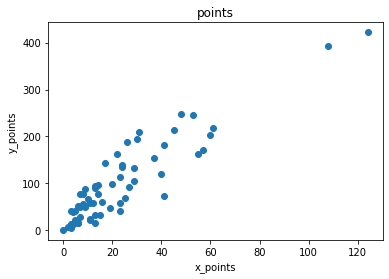

In [0]:
plt.scatter(x1,y1)
plt.plot(np.min(x1), np.max(x1), color = 'green')
plt.xlabel('x_points')
plt.ylabel('y_points')
plt.title('points')
plt.show

In [0]:
print(np.min(x1), np.max(x1))

0 124


In [0]:
def mean(df):
  return sum(df)/float(len(df))

In [0]:
def variance(df, df_mean):
  return sum([(float(x)-df_mean)**2 for x in df])

In [0]:
mean_x, mean_y = mean(x1), mean(y1)
var_x, var_y = variance(x1, mean_x), variance(y1, mean_y)

<h2>Calculate Covariance

The covariance of two groups of numbers describes how those numbers change together.

Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.

In [0]:
def covariance(x1, mean_x, y1, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (float(x[i]) - mean_x) * (float(y[i]) - mean_y)
	return covar

In [0]:
covar = covariance(x1, mean_x, y1, mean_y)
covar

115419.42380952384


<h2>y = b0 + b1*x

<h2>b1 = Σ [ (xi - x_mean)(yi - y_mean) ] / Σ [ (xi - x_mean)2]

<h2>b0 = y - b1 * x

In [0]:
# Calculate coefficients
def coefficients(x1, y1, x_mean, y_mean):
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

In [0]:
b0,b1 = coefficients(x1, y1, mean_x, mean_y)

bunch of crap

In [0]:

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
# Simple Linear Regression on the Swedish Insurance Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Split a dataset into a train and test set
def train_test_split(dataset, split):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)
 
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
	train, test = train_test_split(dataset, split)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = rmse_metric(actual, predicted)
	return rmse
 
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions
 
# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))